# CIFAR 10 - Functional API Modeling

* Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Tensorflow & Keras

* import Keras

In [2]:
import keras

keras.__version__

'2.4.3'

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


# II. Data Preprocessing

> ## 1) Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [7]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


> ## 2) One Hot Encoding

In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Functional API Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의

In [10]:
%%time

from keras import models
from keras import layers

input_img = layers.Input((32,32,3))

x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)


x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)


x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)


x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)


x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(10)(x)
output_y_hat = layers.Activation('softmax')(x)

CIFAR = models.Model(input_img, output_y_hat)

CPU times: user 484 ms, sys: 216 ms, total: 701 ms
Wall time: 5.28 s


* 모델 구조 확인

In [11]:
CIFAR.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0     

> ## 2) Model Compile

* 모델 학습방법 설정

In [12]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 13분

In [13]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 38s 26ms/step - loss: 1.8681 - accuracy: 0.3769 - val_loss: 2.2239 - val_accuracy: 0.2410
Epoch 2/100
313/313 [==============================] - 7s 24ms/step - loss: 1.2065 - accuracy: 0.5705 - val_loss: 1.3912 - val_accuracy: 0.5356
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 1.0075 - accuracy: 0.6465 - val_loss: 1.0674 - val_accuracy: 0.6242
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.9084 - accuracy: 0.6766 - val_loss: 1.0629 - val_accuracy: 0.6294
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.8243 - accuracy: 0.7091 - val_loss: 0.9511 - val_accuracy: 0.6739
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.7723 - accuracy: 0.7256 - val_loss: 1.1569 - val_accuracy: 0.6073
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.7374 - accuracy: 0.7409 - val_loss: 0.9552 - val_accuracy

> ## 4) 학습 결과 시각화

* Loss Visualization

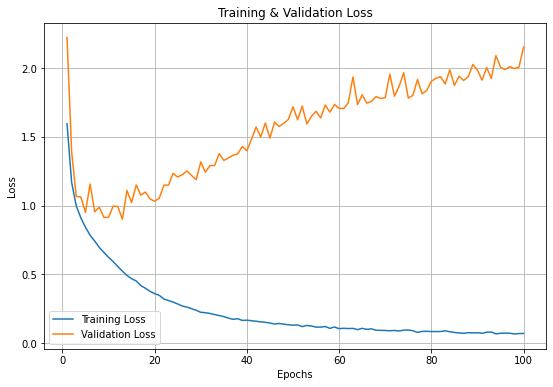

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_CIFAR.history['loss'])
plt.plot(epochs, Hist_CIFAR.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [16]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 2.2456 - accuracy: 0.6696
Loss = 2.24559
Accuracy = 0.66960


# IV. 성능평가

> ## 1) Label Name 지정

In [17]:
import numpy as np

CLASSES = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

preds = CIFAR.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

> ## 2) 비교 시각화

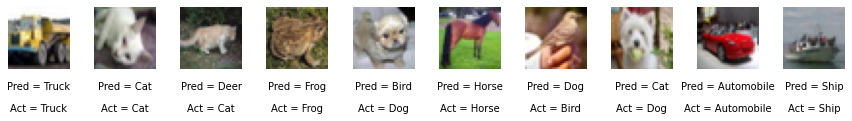

In [19]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            'Pred = ' + str(preds_single[idx]), 
            fontsize = 10, 
            ha = 'center', 
            transform = ax.transAxes) 
    ax.text(0.5, -0.7, 
            'Act = ' + str(actual_single[idx]), 
            fontsize = 10, 
            ha = 'center', 
            transform = ax.transAxes)
    ax.imshow(img)

# 
# 
# 
# The End
# 
# 
# 